In [1]:
import pandas as pd

In [ ]:
df19 = pd.read_csv("data/2019_comptage-velo-donnees-compteurs.csv", on_bad_lines='skip')
df19.head()

,Identifiant du compteur;Nom du compteur;Identifiant du site de comptage;Nom du site de comptage;Comptage horaire;Date et heure de comptage;Date d'installation du site de comptage;Lien vers photo du site de comptage;Coordonnées géographiques
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;0;2019-01-01T07:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;31;2019-01-02T18:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;24;2019-01-03T16:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;2;2019-01-04T04:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;0;2019-01-04T08:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199


In [ ]:
colsToKeep = [
    # 'Identifiant du compteur',
    # 'Nom du compteur',
    # 'Identifiant du site de comptage',
    'Nom du site de comptage',
    'Comptage horaire',
    'Date et heure de comptage',
    #"Date d'installation du site de comptage",
    #'Lien vers photo du site de comptage',
    'Coordonnées géographiques',
    # 'Identifiant technique compteur',
    # 'ID Photos',
    # 'test_lien_vers_photos_du_site_de_comptage_',
    # 'id_photo_1',
    # 'url_sites',
    # 'type_dimage',
    # 'mois_annee_comptage'
]
df19 = pd.read_csv('data/2019_comptage-velo-donnees-compteurs.csv', sep=";", usecols=colsToKeep, on_bad_lines='skip')
df19.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques
0,21 Boulevard Auguste Blanqui SO-NE,0,2019-01-01T07:00:00+01:00,"48.830449,2.353199"
1,21 Boulevard Auguste Blanqui SO-NE,31,2019-01-02T18:00:00+01:00,"48.830449,2.353199"
2,21 Boulevard Auguste Blanqui SO-NE,24,2019-01-03T16:00:00+01:00,"48.830449,2.353199"
3,21 Boulevard Auguste Blanqui SO-NE,2,2019-01-04T04:00:00+01:00,"48.830449,2.353199"
4,21 Boulevard Auguste Blanqui SO-NE,0,2019-01-04T08:00:00+01:00,"48.830449,2.353199"


In [4]:
df19.shape

(436729, 4)

In [5]:
# Séparer latitude et longitude
df19[['latitude', 'longitude']] = df19['Coordonnées géographiques'].str.split(',', n=1, expand=True)

df19["Date et heure de comptage"] = pd.to_datetime(
    df19["Date et heure de comptage"], 
    utc=True,    # rend les dates tz‑aware (UTC)
    errors='coerce'
)

In [6]:
df19_sortedbyplace = df19.sort_values(by=["Nom du site de comptage","Date et heure de comptage"])
df19_sortedbyplace.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
436184,10 avenue de la Grande Armée SE-NO,1,2018-12-31 23:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
260738,10 avenue de la Grande Armée SE-NO,0,2019-01-01 00:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
59729,10 avenue de la Grande Armée SE-NO,3,2019-01-01 01:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
398556,10 avenue de la Grande Armée SE-NO,3,2019-01-01 02:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
302305,10 avenue de la Grande Armée SE-NO,2,2019-01-01 03:00:00+00:00,"48.874716,2.292439",48.874716,2.292439


In [7]:
cols = ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude"]
df19_sites = df19[cols].drop_duplicates(subset=["Nom du site de comptage"])
print(df19_sites.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df19_sites

(60, 4)


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude
0,21 Boulevard Auguste Blanqui SO-NE,"48.830449,2.353199",48.830449,2.353199
452,Pont du Garigliano NO-SE,"48.839927,2.267151",48.839927,2.267151
886,102 Bd magenta SE-NO,"48.877726,2.354926",48.877726,2.354926
1317,26 Boulevard de Ménilmontant SE-NO,"48.860622,2.388724",48.860622,2.388724
1491,16 Avenue de la Porte des Ternes E-O,"48.8818100845,2.28154603106",48.8818100845,2.28154603106
1911,Face au 16 Avenue de la Porte des Ternes O-E,"48.881626,2.281203",48.881626,2.281203
2327,72 Bd Richard Lenoir S-N,"48.86077,2.372742",48.86077,2.372742
2927,pont des Invalides S-N,"48.86282,2.31061",48.86282,2.31061
2998,33 avenue des Champs Elysées NO-SE,"48.869831,2.307076",48.869831,2.307076
3078,129 Rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301


In [8]:
import geopandas as gpd

# 1. Copie du DataFrame de base
df = df19_sites.copy()

# 2. Nettoyage des coordonnées
df['latitude']  = pd.to_numeric(df['latitude'],  errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude'])

# 3. Création d’un GeoDataFrame à partir du DataFrame nettoyé
gdf_sites = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# 4. Chargement et projection des arrondissements
url_geojson = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
gdf_arr = gpd.read_file(url_geojson)
gdf_arr = gdf_arr.to_crs(epsg=4326)

# 5. Spatial join — points dans les polygones
gdf_joined = gpd.sjoin(gdf_sites, gdf_arr, how="left", predicate="within")

# 6. Sélection & renommage des colonnes d’intérêt
df19_final = gdf_joined[
    ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude", "l_ar"]
].rename(columns={"l_ar": "arrondissement"})

df19_final


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,21 Boulevard Auguste Blanqui SO-NE,"48.830449,2.353199",48.830449,2.353199,13ème Ardt
452,Pont du Garigliano NO-SE,"48.839927,2.267151",48.839927,2.267151,16ème Ardt
886,102 Bd magenta SE-NO,"48.877726,2.354926",48.877726,2.354926,10ème Ardt
1317,26 Boulevard de Ménilmontant SE-NO,"48.860622,2.388724",48.860622,2.388724,20ème Ardt
1491,16 Avenue de la Porte des Ternes E-O,"48.8818100845,2.28154603106",48.881810,2.281546,17ème Ardt
1911,Face au 16 Avenue de la Porte des Ternes O-E,"48.881626,2.281203",48.881626,2.281203,17ème Ardt
2327,72 Bd Richard Lenoir S-N,"48.86077,2.372742",48.860770,2.372742,11ème Ardt
2927,pont des Invalides S-N,"48.86282,2.31061",48.862820,2.310610,7ème Ardt
2998,33 avenue des Champs Elysées NO-SE,"48.869831,2.307076",48.869831,2.307076,8ème Ardt
3078,129 Rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301000,15ème Ardt


In [9]:
import pandas as pd

def list_to_semicolon_str(lst):
    return "; ".join(str(v) for v in lst if pd.notna(v))

# Regroupement par arrondissement et concaténation des coordonnées
tableau_arr = (
    df19_final
    .groupby("arrondissement", dropna=False)
    .agg({
        "Coordonnées géographiques": lambda x: list_to_semicolon_str(x),
        "latitude": lambda x: list_to_semicolon_str(x),
        "longitude": lambda x: list_to_semicolon_str(x)
    })
    .reset_index()
)

# Trier les arrondissements par numéro — si le nom contient un nombre
# On extrait le premier nombre trouvé dans la chaîne (ex “12e”, “8”, etc.)
tableau_arr['arr_num'] = (
    tableau_arr['arrondissement']
    .str.extract(r'(\d+)', expand=False)  # capture les chiffres
    .astype(float, errors='ignore')       # convertit en float si possible
)

# Trier par ce numéro, en mettant les NaN (arrondissements sans numéro numérique) à la fin
tableau_arr = tableau_arr.sort_values(
    by='arr_num', na_position='last'
).drop(columns='arr_num').reset_index(drop=True)

# Optionnel : afficher tout, mais attention si le tableau est très long
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

tableau_arr


,arrondissement,Coordonnées géographiques,latitude,longitude
0,3ème Ardt,"48.86521,2.35358",48.86521,2.35358
1,4ème Ardt,"48.85735,2.35211; 48.85372,2.35702",48.85735; 48.85372,2.35211; 2.35702
2,5ème Ardt,"48.85013,2.35423",48.85013,2.35423
3,6ème Ardt,"48.840801,2.333233",48.840801,2.333233
4,7ème Ardt,"48.86282,2.31061; 48.86284,2.310345; 48.86179,2.32014; 48.86288,2.31179",48.86282; 48.86284; 48.86179; 48.86288,2.31061; 2.310345; 2.32014; 2.31179
5,8ème Ardt,"48.869831,2.307076; 48.86392,2.31988; 48.86378,2.32003; 48.869873,2.307419",48.869831; 48.86392; 48.86378; 48.869873,2.307076; 2.31988; 2.32003; 2.307419
6,10ème Ardt,"48.877726,2.354926; 48.877686,2.3544712; 48.877667,2.350556; 48.87746,2.35008",48.877726; 48.877686; 48.877667; 48.87746,2.354926; 2.3544712; 2.350556; 2.35008
7,11ème Ardt,"48.86077,2.372742; 48.86155,2.37407; 48.86149,2.37376; 48.860528,2.388364; 48.860852,2.372279",48.86077; 48.86155; 48.86149; 48.860528; 48.860852,2.372742; 2.37407; 2.37376; 2.388364; 2.372279
8,12ème Ardt,"48.8303305218,2.40055083752; 48.83848,2.37587; 48.846099,2.375456; 48.846028,2.375429; 48.843435,2.383378; 48.8295233,2.38699",48.8303305218; 48.83848; 48.846099; 48.846028; 48.843435; 48.8295233,2.40055083752; 2.37587; 2.375456; 2.375429; 2.383378; 2.38699
9,13ème Ardt,"48.830449,2.353199; 48.82024,2.35902; 48.82026,2.3592; 48.830901,2.353237; 48.84223,2.36811; 48.82682,2.38465; 48.826503,2.38434; 48.8344028,2.376941",48.830449; 48.82024; 48.82026; 48.830901; 48.84223; 48.82682; 48.826503; 48.8344028,2.353199; 2.35902; 2.3592; 2.353237; 2.36811; 2.38465; 2.38434; 2.376941


In [10]:
df19.shape

(436729, 6)

In [11]:
df19["Date et heure de comptage"] = pd.to_datetime(df19["Date et heure de comptage"], utc=True)
df19["Date et heure de comptage"] = df19["Date et heure de comptage"].dt.tz_convert("Europe/Paris")
date_min = df19["Date et heure de comptage"].min()
date_max = df19["Date et heure de comptage"].max()

print("Date la plus ancienne :", date_min)
print("Date la plus récente :", date_max)

Date la plus ancienne : 2019-01-01 00:00:00+01:00
Date la plus récente : 2019-12-31 00:00:00+01:00


In [12]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2019
mois = [f"2019-{m:02d}" for m in range(1, 13)]


results_temp = []

# Groupement par arrondissement (issu de df18_final)
for arr, df_arr in df19_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_temp = []

        # Boucle sur les sites de l’arrondissement
        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=apparent_temperature"
                    "&timezone=Europe/Paris"
                )

                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Sécurité si données manquantes
                if "hourly" in data and "apparent_temperature" in data["hourly"]:
                    toutes_temp.extend(data["hourly"]["apparent_temperature"])

            except Exception as e:
                print(f"❌ Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = (
            sum(toutes_temp) / len(toutes_temp)
            if toutes_temp else None
        )

    results_temp.append(lignes_arr)

# DataFrame final
df19_temp_mensuel = pd.DataFrame(results_temp)

# Tri par numéro d’arrondissement
df19_temp_mensuel["arr_num"] = (
    df19_temp_mensuel["arrondissement"]
    .str.extract(r"(\d+)")
    .astype(float)
)

df19_temp_mensuel = (
    df19_temp_mensuel
    .sort_values("arr_num", na_position="last")
    .drop(columns="arr_num")
    .reset_index(drop=True)
)

# Sauvegarde locale
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2019_temperature_mensuelle_moyenne_par_arrondissement.csv"
)

df19_temp_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")


# Affichage
with pd.option_context(
    'display.max_columns', None,
    'display.max_colwidth', None,
    'display.width', None
):
    print(df19_temp_mensuel)


✅ Data sauvegardée dans data/2019_temperature_mensuelle_moyenne_par_arrondissement.csv
   arrondissement   2019-01   2019-02   2019-03   2019-04    2019-05  \
0       3ème Ardt -0.015995  2.765327  5.219355  7.950278  10.798118   
1       4ème Ardt  0.038642  3.027530  5.239852  8.084861  10.876344   
2       5ème Ardt  0.141398  3.131845  5.345296  8.192222  10.986828   
3       6ème Ardt -0.193145  2.790923  5.001478  7.845139  10.628360   
4       7ème Ardt  0.092944  2.875074  5.333737  8.062257  10.911727   
5       8ème Ardt  0.031485  2.814174  5.269926  7.999757  10.847278   
6      10ème Ardt -0.138038  2.642485  5.096808  7.823333  10.665087   
7      11ème Ardt -0.181640  2.743155  4.972742  7.886778  10.710054   
8      12ème Ardt -0.121147  2.850149  5.067585  8.031273  10.824507   
9      13ème Ardt -0.075857  2.904167  5.119254  8.022778  10.814147   
10     14ème Ardt -0.184644  2.800967  5.009610  7.851597  10.636526   
11     15ème Ardt  0.017204  3.007440  5.217384  

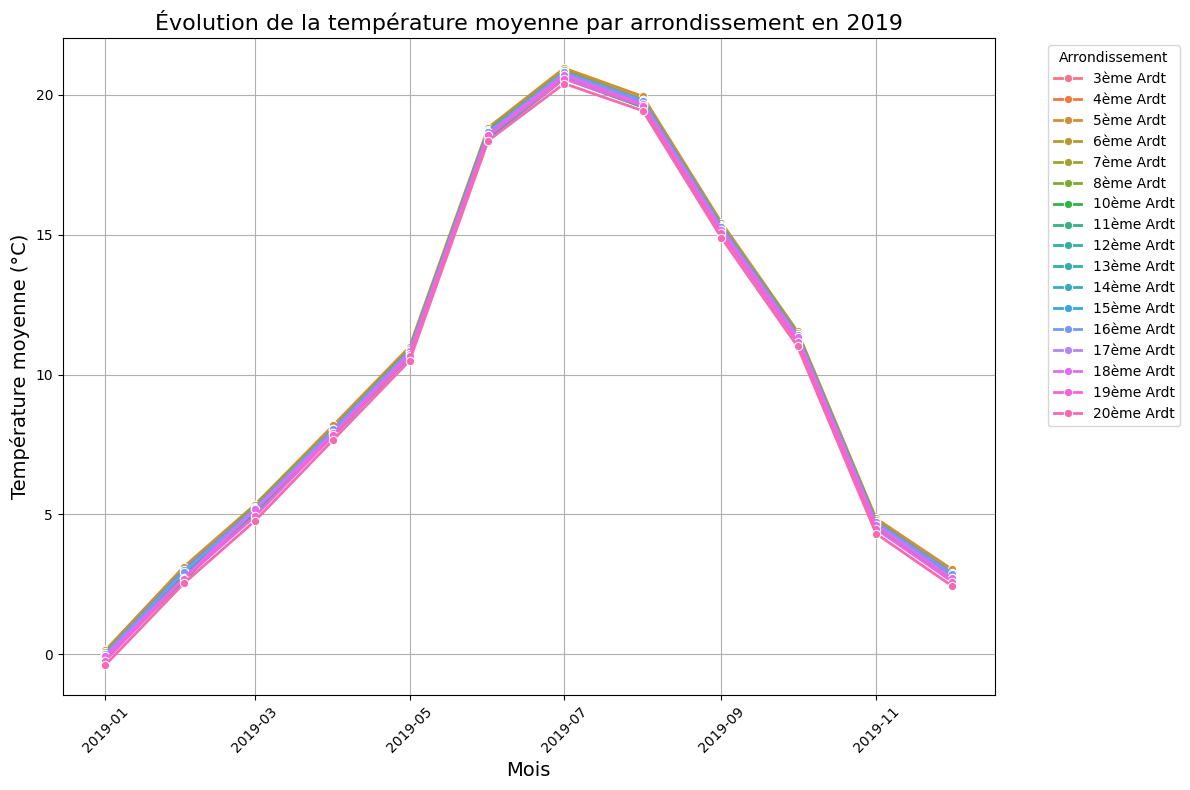

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2019_temperature_mensuelle_moyenne_par_arrondissement.csv"
df19_temp_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df19_long = df19_temp_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="temperature_moyenne_°C"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df19_long["mois"] = pd.to_datetime(df19_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df19_long,
    x="mois",
    y="temperature_moyenne_°C",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la température moyenne par arrondissement en 2019', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Température moyenne (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2019
mois = [f"2019-{m:02d}" for m in range(1, 13)]

results_precip = []

for arr, df_arr in df19_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_precip = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=precipitation"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Vérifie que la clé existe et étend la liste
                if "hourly" in data and "precipitation" in data["hourly"]:
                    toutes_precip.extend(data["hourly"]["precipitation"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        # Somme des précipitations du mois (total pour l'arrondissement)
        lignes_arr[periode] = sum(toutes_precip) if toutes_precip else None

    results_precip.append(lignes_arr)

df19_precip_mensuel = pd.DataFrame(results_precip)
df19_precip_mensuel["arr_num"] = df19_precip_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df19_precip_mensuel = df19_precip_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2019_precipitations_mensuelles_moyennes_par_arrondissement.csv"
)

df19_precip_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df19_precip_mensuel)  # ou df18_precip_mensuel selon nom variable


✅ Data sauvegardée dans data/2019_precipitations_mensuelles_moyennes_par_arrondissement.csv
   arrondissement  2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  \
11      3ème Ardt     48.4     30.2     63.9     28.1     82.7     69.2   
12      4ème Ardt    109.8     56.2    113.0     53.6    173.8    133.0   
13      5ème Ardt     54.9     28.1     56.5     26.8     86.9     66.5   
14      6ème Ardt     54.9     28.1     56.5     26.8     86.9     66.5   
15      7ème Ardt    193.6    120.8    255.6    112.4    330.8    276.8   
16      8ème Ardt    193.6    120.8    255.6    112.4    330.8    276.8   
0      10ème Ardt    193.6    120.8    255.6    112.4    330.8    276.8   
1      11ème Ardt    267.0    171.5    320.5    146.0    420.5    369.5   
2      12ème Ardt    334.8    199.8    355.2    175.8    502.8    459.0   
3      13ème Ardt    442.8    245.6    462.8    224.4    682.8    572.0   
4      14ème Ardt    219.6    112.4    226.0    107.2    347.6    266.0   
5      1

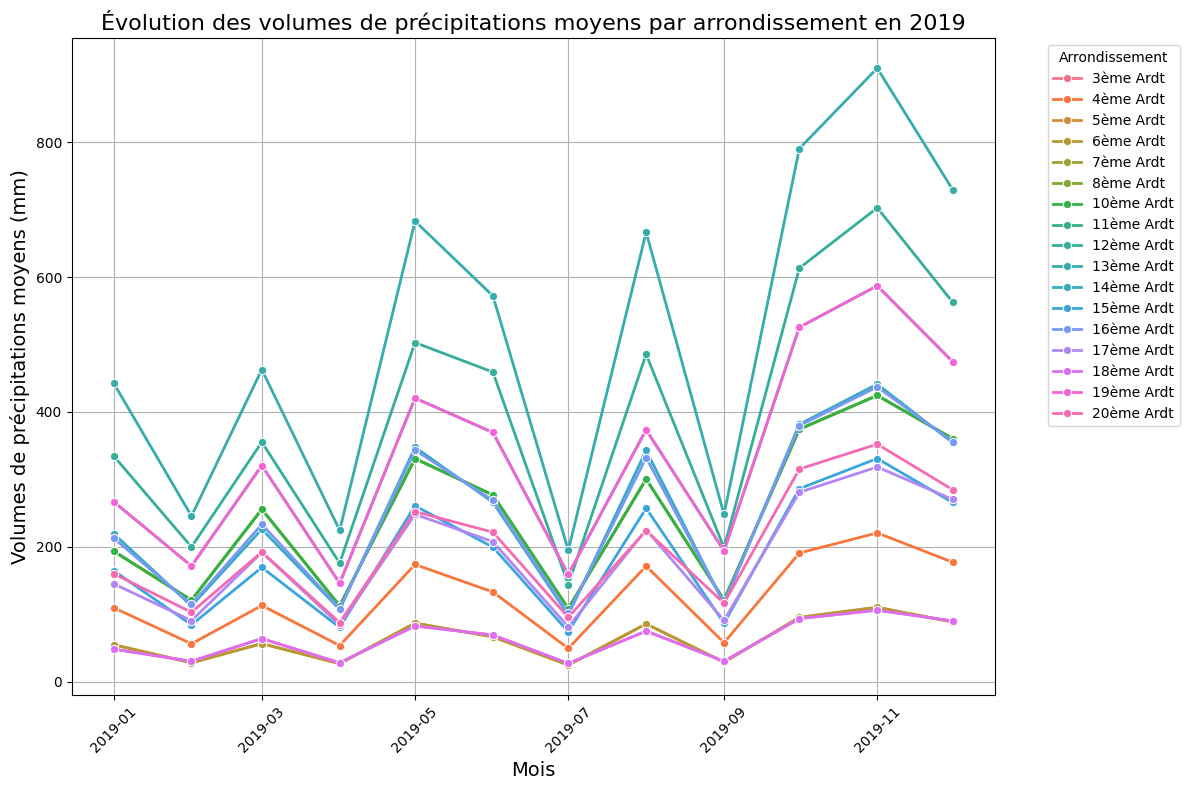

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2019_precipitations_mensuelles_moyennes_par_arrondissement.csv"
df19_precip_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df19_long = df19_precip_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="volumes_precipitations_moyens_mm"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df19_long["mois"] = pd.to_datetime(df19_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df19_long,
    x="mois",
    y="volumes_precipitations_moyens_mm",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution des volumes de précipitations moyens par arrondissement en 2019', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Volumes de précipitations moyens (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2019
mois = [f"2019-{m:02d}" for m in range(1, 13)]

results_cloud = []

for arr, df_arr in df19_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_cloud = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=cloud_cover"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                if "hourly" in data and "cloud_cover" in data["hourly"]:
                    toutes_cloud.extend(data["hourly"]["cloud_cover"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = sum(toutes_cloud)/len(toutes_cloud) if toutes_cloud else None

    results_cloud.append(lignes_arr)

df19_cloud_mensuel = pd.DataFrame(results_cloud)
df19_cloud_mensuel["arr_num"] = df19_cloud_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df19_cloud_mensuel = df19_cloud_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2019_cloudcover_mensuel_moyen_par_arrondissement.csv"
)

df19_cloud_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df19_cloud_mensuel)


✅ Data sauvegardée dans data/2019_cloudcover_mensuel_moyen_par_arrondissement.csv
   arrondissement    2019-01    2019-02    2019-03    2019-04    2019-05  \
11      3ème Ardt  77.426075  45.849702  61.594086  55.347222  60.229839   
12      4ème Ardt  77.079301  44.736607  61.419355  55.488889  60.077957   
13      5ème Ardt  77.079301  44.736607  61.419355  55.488889  60.077957   
14      6ème Ardt  77.079301  44.736607  61.419355  55.488889  60.077957   
15      7ème Ardt  77.426075  45.849702  61.594086  55.347222  60.229839   
16      8ème Ardt  77.426075  45.849702  61.594086  55.347222  60.229839   
0      10ème Ardt  77.426075  45.849702  61.594086  55.347222  60.229839   
1      11ème Ardt  78.365591  46.748512  60.813172  55.748611  60.138441   
2      12ème Ardt  77.778226  45.601190  60.903226  56.230556  60.228495   
3      13ème Ardt  77.428763  45.168899  61.161290  55.859722  60.153226   
4      14ème Ardt  77.079301  44.736607  61.419355  55.488889  60.077957   
5     

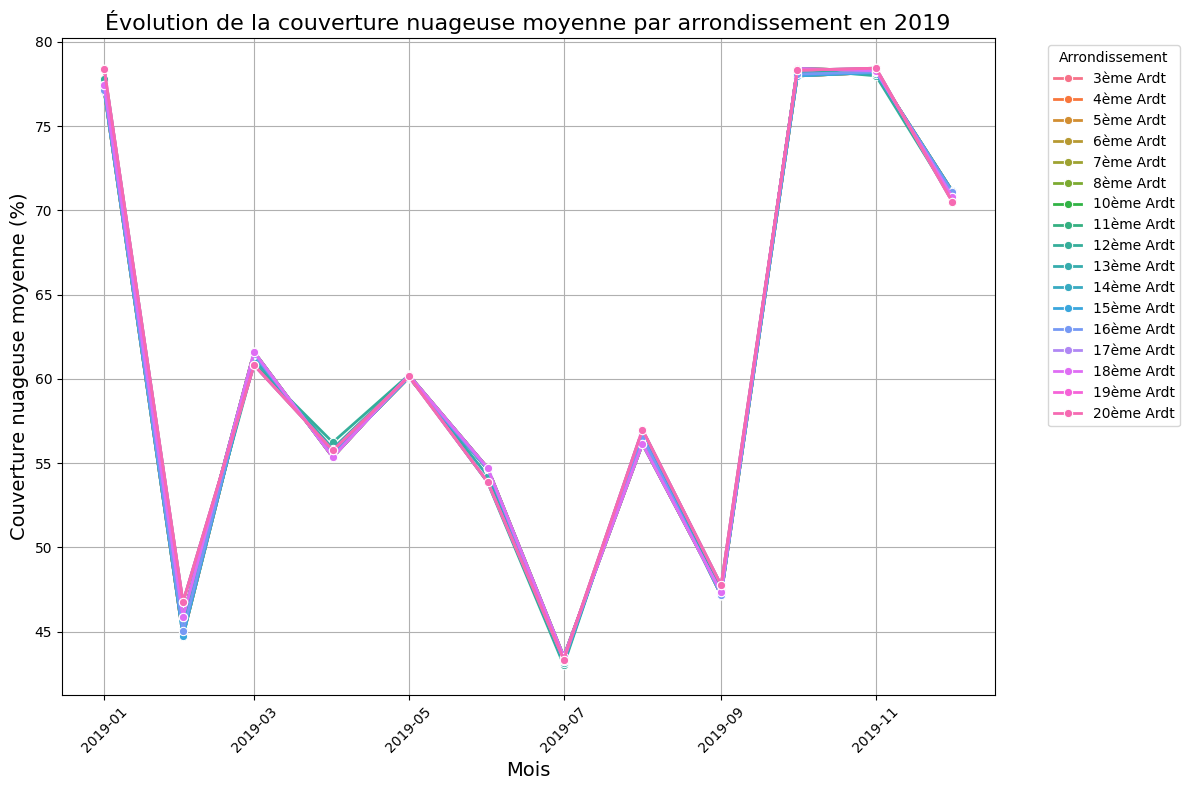

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2019_cloudcover_mensuel_moyen_par_arrondissement.csv"
df19_cloud_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df19_long = df19_cloud_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="couverture_nuageuse_moyenne_%"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df19_long["mois"] = pd.to_datetime(df19_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df19_long,
    x="mois",
    y="couverture_nuageuse_moyenne_%",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la couverture nuageuse moyenne par arrondissement en 2019', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Couverture nuageuse moyenne (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
